#Toy Examples

###One-Hot-Encoding

In [ ]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=10)
print("tokenizer:",tokenizer)
print("\n")
print(tokenizer.fit_on_texts(samples))
print("\n")

word_index = tokenizer.word_index
print(word_index)
print("\n")

sequences = tokenizer.texts_to_sequences(samples)
print("Sequnecs:",sequences)
print("\n")
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print("1hot:\n",one_hot_results)
print("\n")
print('Found %s unique tokens.' % len(word_index))

tokenizer: <keras_preprocessing.text.Tokenizer object at 0x7f4f16f61250>


None


Sequnecs: [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


1hot:
 [[0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1.]]


{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
Found 9 unique tokens.


###One-Hot-Encoding with Hashing Trick

In [ ]:
import numpy as np

max_length=10;
dimensionality = 1000
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
results = np.zeros((len(samples), max_length, dimensionality))#np.zeros(2,10,1000)-->samples, rows, columns
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
samples[0]

'The cat sat on the mat.'

In [ ]:
samples[0].split()


['The', 'cat', 'sat', 'on', 'the', 'mat.']

In [ ]:
enumerate(samples[0].split())

In [ ]:
for i,word in list(enumerate(samples[0].split()))[:max_length]:
  print(i)

0
1
2
3
4
5


In [ ]:
a =[[ [1,2,3],[1 ,2,3]     ],[ [1,2,3],[1 ,2,3]     ]]
a[0][0][0]

1

In [4]:
for i, sample in enumerate(samples):
  print(i,sample,"\n")
  for j, word in list(enumerate(sample.split())):
    index = abs(hash(word)) % 1000
    print(index)
    results[i, j, index] = 1.

0 The cat sat on the mat. 

753
833
744
511
477
998
1 The dog ate my homework. 

753
171
655
520
159


#Embedding Layer

The Embedding layer takes at least two
arguments: the number of possible tokens
(here, 1,000: 1 + maximum word index)
and the dimensionality of the embeddings
(here, 64).

###  Instantiating an Embedding layer

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)#layer takes at least 2arguments: the number of possible tokens (here, 1,000: 1 + maximum word index)
                                    #and the dimensionality of the embeddings

###  Loading the IMDB data for use with an Embedding layer

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000  #number of words
maxlen = 20          #Cuts off the text after this number of words (among the max_features most common words)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(x_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
#x_train[0]

In [ ]:
#Turns the lists of integers into a 2D integer tensor of shape (samples,dimensionailty= maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = 20)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train)
print("\n")
print(x_train[0])
print("shape")
print(x_train.shape)
print("tensor")
print(x_train.ndim)

[[  65   16   38 ...   19  178   32]
 [  23    4 1690 ...   16  145   95]
 [1352   13  191 ...    7  129  113]
 ...
 [  11 1818 7561 ...    4 3586    2]
 [  92  401  728 ...   12    9   23]
 [ 764   40    4 ...  204  131    9]]


[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]
shape
(25000, 20)
tensor
2


### Using an Embedding layer and classifier on the IMDB data

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.3)

Epoch 1/10
547/547 [==============================] - 2s 2ms/step - loss: 0.1491 - acc: 0.9483 - val_loss: 0.5850 - val_acc: 0.7580
Epoch 2/10
547/547 [==============================] - 1s 2ms/step - loss: 0.1403 - acc: 0.9510 - val_loss: 0.5999 - val_acc: 0.7556
Epoch 3/10
547/547 [==============================] - 1s 2ms/step - loss: 0.1320 - acc: 0.9538 - val_loss: 0.6157 - val_acc: 0.7521
Epoch 4/10
547/547 [==============================] - 1s 2ms/step - loss: 0.1247 - acc: 0.9571 - val_loss: 0.6327 - val_acc: 0.7493
Epoch 5/10
547/547 [==============================] - 1s 2ms/step - loss: 0.1176 - acc: 0.9602 - val_loss: 0.6500 - val_acc: 0.7455
Epoch 6/10
547/547 [==============================] - 1s 2ms/step - loss: 0.1110 - acc: 0.9631 - val_loss: 0.6677 - val_acc: 0.7453
Epoch 7/10
547/547 [==============================] - 1s 2ms/step - loss: 0.1050 - acc: 0.9659 - val_loss: 0.6852 - val_acc: 0.7428
Epoch 8/10
547/547 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
history = history.history

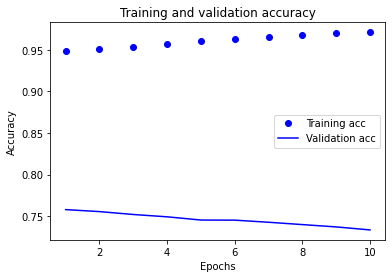

In [ ]:
import matplotlib.pyplot as plt
loss_values     = history['loss']
val_loss_values = history['val_loss']
acc             = history['acc']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, history['acc'], 'bo', label='Training acc')
plt.plot(epochs, history['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()